In [86]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# TODO -- UPDATE THIS DIR --
WORKING_DIR='/Users/tiffpro/code/deloitte_ai'
uber_dir = os.path.join(WORKING_DIR, 'data', 'uber-trip-data')
fhv_dir = os.path.join(WORKING_DIR, 'data', 'other-FHV-data')

## Uber

In [89]:
uber_janjune15_df = pd.read_csv(f'{uber_dir}/uber-raw-data-janjune-15.csv')

uber_janjune15_df["Pickup_date"] = pd.to_datetime(uber_janjune15_df["Pickup_date"]) # cast date to reorder
uber_janjune15_df.sort_values(by='Pickup_date', inplace=True)
uber_janjune15_df.head(10)


,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
832778,B02764,2015-01-01 00:00:05,B02764,255
90608,B02598,2015-01-01 00:00:05,B02598,144
9371715,B02682,2015-01-01 00:00:08,B02682,113
9368311,B02682,2015-01-01 00:00:11,B02617,234
1084752,B02764,2015-01-01 00:00:13,B02764,232
7080479,B02617,2015-01-01 00:00:14,B02617,90
7077415,B02617,2015-01-01 00:00:16,B02617,225
7696272,B02764,2015-01-01 00:00:19,B02764,181
11698921,B02764,2015-01-01 00:00:25,NaN,229
7115336,B02617,2015-01-01 00:00:27,B02764,33


In [90]:
## NOW -- ATTACH BOROUGH IF IT MATCHES LOCATION_ID COLUMN 
location_lookup_df = pd.read_csv(f'{uber_dir}/taxi-zone-lookup.csv')
location_lookup_df.rename({'LocationID':'locationID'}, axis='columns', inplace=True)  # to match schemas
location_lookup_df


cols = ['locationID']
uber_janjune15_df.join(location_lookup_df.set_index(cols), on=cols)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Borough,Zone
832778,B02764,2015-01-01 00:00:05,B02764,255,Brooklyn,Williamsburg (North Side)
90608,B02598,2015-01-01 00:00:05,B02598,144,Manhattan,Little Italy/NoLiTa
9371715,B02682,2015-01-01 00:00:08,B02682,113,Manhattan,Greenwich Village North
9368311,B02682,2015-01-01 00:00:11,B02617,234,Manhattan,Union Sq
1084752,B02764,2015-01-01 00:00:13,B02764,232,Manhattan,Two Bridges/Seward Park
...,...,...,...,...,...,...
8493453,B02764,2015-06-30 23:59:00,B02764,246,Manhattan,West Chelsea/Hudson Yards
8493454,B02764,2015-06-30 23:59:00,B00628,90,Manhattan,Flatiron
8493455,B02764,2015-06-30 23:59:00,B02764,148,Manhattan,Lower East Side
8493457,B02764,2015-06-30 23:59:00,B02765,231,Manhattan,TriBeCa/Civic Center


## Comparing FHV and Uber

In [91]:
# rely on aggregate data XLSX because it contains data for 10 FHVS + Uber + 2 Taxis

df = pd.read_excel(f'{WORKING_DIR}/data/Aggregate_FHV_Data.xlsx', index_col='Date')
df = df.drop(['Yellow Taxis', 'Green Taxis'], axis=1)  # drop taxis. they inflate everything!
df[0:10]

,American,Carmel,Dial 7,Diplo,Firstclass,Highclass,Prestige,Skyline,Lyft,Uber
Date,,,,,,,,,,
2014-07-01,921,2871,2233,1046,1744,1368,3345,1668,0,21228
2014-07-02,1028,2965,2409,1275,2228,1661,3533,1691,0,26480
2014-07-03,1068,3361,2520,1200,2121,1599,3649,1157,0,21597
2014-07-04,1008,2174,1955,1171,1459,1622,3401,337,0,14148
2014-07-05,1214,1846,1371,1371,1703,1898,4081,276,0,10890
2014-07-06,1048,2480,1872,1251,1501,1738,3545,401,0,11443
2014-07-07,893,3028,2213,1009,1768,1457,3284,1330,0,18280
2014-07-08,916,2706,2073,1065,1815,1387,3171,1634,0,25763
2014-07-09,841,2883,2209,987,1827,1342,3176,1897,0,27817


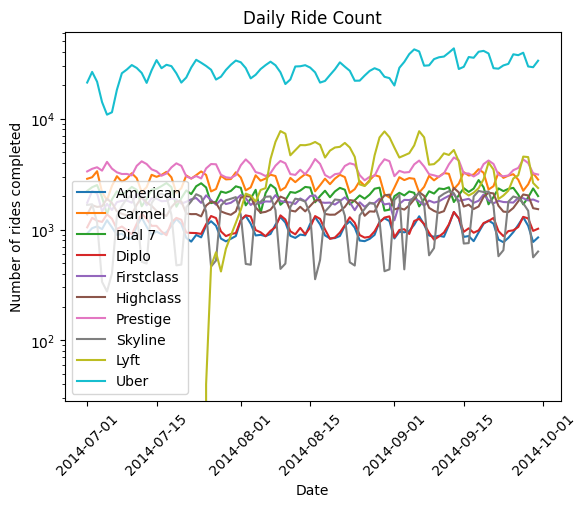

<Figure size 10000x600 with 0 Axes>

In [82]:
'''
Graph v1.
'''

plt.plot(df)
plt.title('Daily Ride Count')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.yscale('log')   
plt.ylabel('Number of rides completed')
plt.legend(df.columns)
plt.figure(figsize=(100,6))
plt.show()

# This graph is not ideal
# LEGEND IS OBSTRUCTING but not easy to fix in matplotlib :(

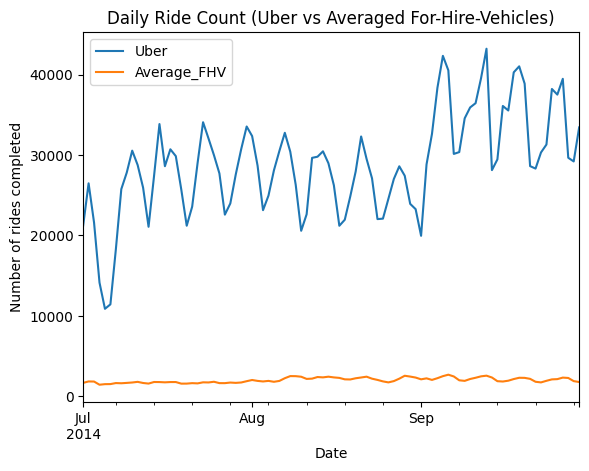

In [74]:
'''
Graph 1a. Improve legibility of above graph by averaging FHV counts.
'''
df_1a = df.copy()
# get mean 
col = df_1a.loc[: , "American":"Lyft"].mean(axis=1)  # create a col to hold the mean of #rides of the FHVs we care about
df_1a['Average_FHV'] = col     # reference: https://stackoverflow.com/questions/48366506/calculate-new-column-as-the-mean-of-other-columns-in-pandas  

# plot
df_1a.plot(y=['Uber', 'Average_FHV'])
plt.title('Daily Ride Count (Uber vs Averaged For-Hire-Vehicles)')
plt.xlabel('Date')
plt.ylabel('Number of rides completed')
#plt.figure(figsize=(100,6))
plt.show()

Text(0, 0.5, 'Number of rides completed')

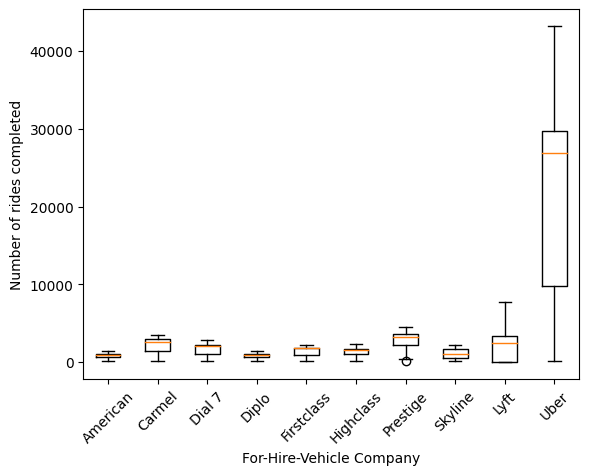

In [84]:
'''
Descriptive. Graph 2.
'''
y = df.describe()
plt.boxplot(y)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], df.columns, rotation=45)
plt.xlabel('For-Hire-Vehicle Company')
#plt.yscale('log')
plt.ylabel('Number of rides completed')

In [76]:
y

,American,Carmel,Dial 7,Diplo,Firstclass,Highclass,Prestige,Skyline,Lyft,Uber
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,996.869565,2788.250000,2119.478261,1071.195652,1812.706522,1651.358696,3485.228261,1388.000000,2909.793478,28842.739130
std,164.835930,382.765892,298.369617,163.539170,147.317221,246.792059,435.345135,629.758981,2443.941383,6353.066019
min,768.000000,1846.000000,1371.000000,810.000000,1211.000000,1315.000000,2781.000000,276.000000,0.000000,10890.000000
25%,860.000000,2453.000000,1912.250000,936.500000,1742.000000,1456.500000,3111.500000,621.000000,0.000000,24922.500000
50%,944.000000,2882.500000,2193.000000,1030.000000,1802.000000,1602.500000,3350.000000,1634.500000,2512.500000,28791.500000
75%,1114.500000,3079.750000,2348.250000,1227.000000,1900.750000,1816.500000,3878.250000,1897.750000,4876.500000,32316.250000
max,1440.000000,3507.000000,2795.000000,1440.000000,2228.000000,2375.000000,4470.000000,2230.000000,7740.000000,43205.000000
